In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import matthews_corrcoef, accuracy_score, roc_auc_score
import numpy as np

# Load the dataset
file_path = '/content/autoinhibited vs non oncogene.csv'
df = pd.read_csv(file_path)

# Select relevant features and target variable
X = df[['CO', 'X', 'S', 'P', 'IP']]
y = df['Source']  # 0 = non-oncogene, 1 = auto_inhibited

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)

# Best hyperparameters
best_params = grid_search.best_params_

# Display results from the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Extract relevant columns for display
results = results[['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'mean_test_score']]

# Sort by the mean_test_score (AUC)
results = results.sort_values(by='mean_test_score', ascending=False)

# Display the hyperparameters and performance table
print(results)

# Display best hyperparameters and corresponding performance
print("Best Hyperparameters:", best_params)
print("Best AUC Score:", grid_search.best_score_)


   param_n_estimators param_learning_rate param_max_depth  mean_test_score
10                100                 0.1               3         0.857303
20                150                 0.2               3         0.854101
19                100                 0.2               3         0.849960
24                 50                 0.2               7         0.846828
11                150                 0.1               3         0.844242
13                100                 0.1               5         0.839374
18                 50                 0.2               3         0.838030
21                 50                 0.2               5         0.836737
23                150                 0.2               5         0.835727
17                150                 0.1               7         0.834222
5                 150                0.01               5         0.833838
14                150                 0.1               5         0.833091
4                 100    

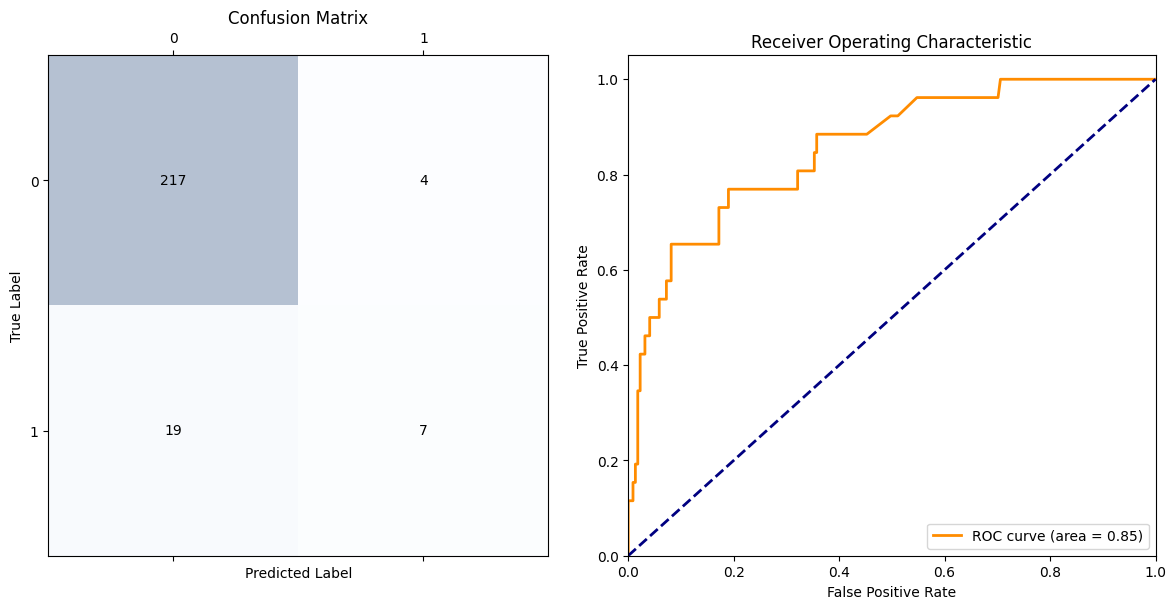

Matthews Correlation Coefficient: 0.37362091199332975
Accuracy: 0.9068825910931174
AUC: 0.8545945005221023


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, matthews_corrcoef, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = '/content/autoinhibited vs non oncogene.csv'
df = pd.read_csv(file_path)

# Select relevant features and target variable
X = df[['CO', 'X', 'S', 'P', 'IP']]
y = df['Source']  # 0 = non-oncogene, 1 = auto_inhibited

# Initialize the Gradient Boosting Classifier with the best hyperparameters
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Perform cross-validation predictions
y_pred = cross_val_predict(gbm, X, y, cv=5)

# Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)

# Matthews Correlation Coefficient
mcc = matthews_corrcoef(y, y_pred)

# Accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate AUC Score and plot ROC curve
y_prob = cross_val_predict(gbm, X, y, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Plot confusion matrix and ROC curve
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
ax[0].matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax[0].text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center')
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# Plot ROC curve
ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Display key metrics
print("Matthews Correlation Coefficient:", mcc)
print("Accuracy:", accuracy)
print("AUC:", roc_auc)
